In [1]:
from google.colab import files
uploaded = files.upload()

###upload these files:
# ne_110m_admin_0_countries.cpg to ne_110m_admin_0_countries.cpg
# ne_110m_admin_0_countries.dbf to ne_110m_admin_0_countries.dbf
# ne_110m_admin_0_countries.prj to ne_110m_admin_0_countries.prj
# ne_110m_admin_0_countries.shp to ne_110m_admin_0_countries.shp
# ne_110m_admin_0_countries.shx to ne_110m_admin_0_countries.shx

Saving ne_110m_admin_0_countries.shx to ne_110m_admin_0_countries.shx
Saving ne_110m_admin_0_countries.shp to ne_110m_admin_0_countries.shp
Saving ne_110m_admin_0_countries.prj to ne_110m_admin_0_countries.prj
Saving ne_110m_admin_0_countries.dbf to ne_110m_admin_0_countries.dbf
Saving ne_110m_admin_0_countries.cpg to ne_110m_admin_0_countries.cpg


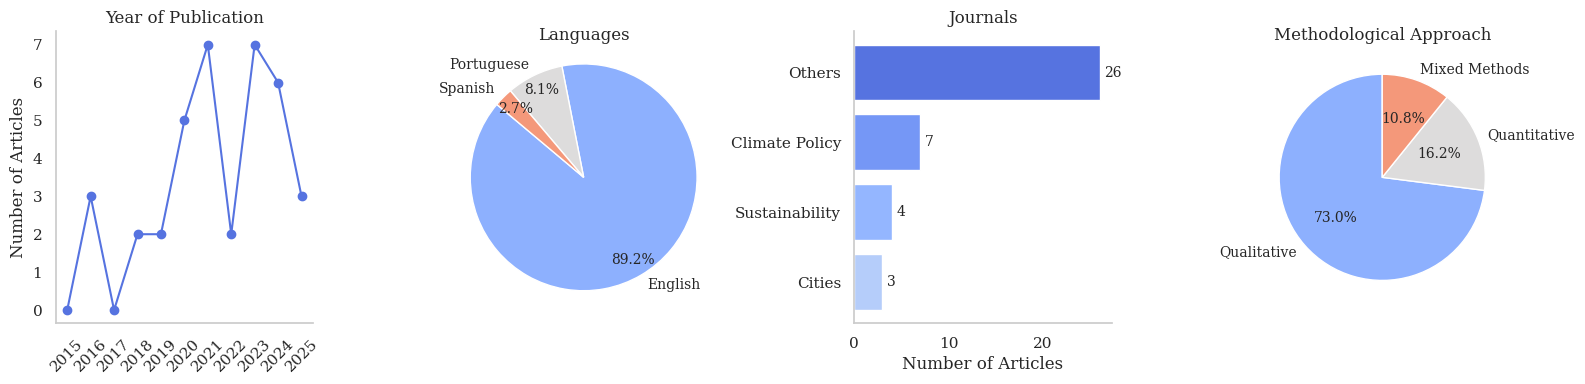

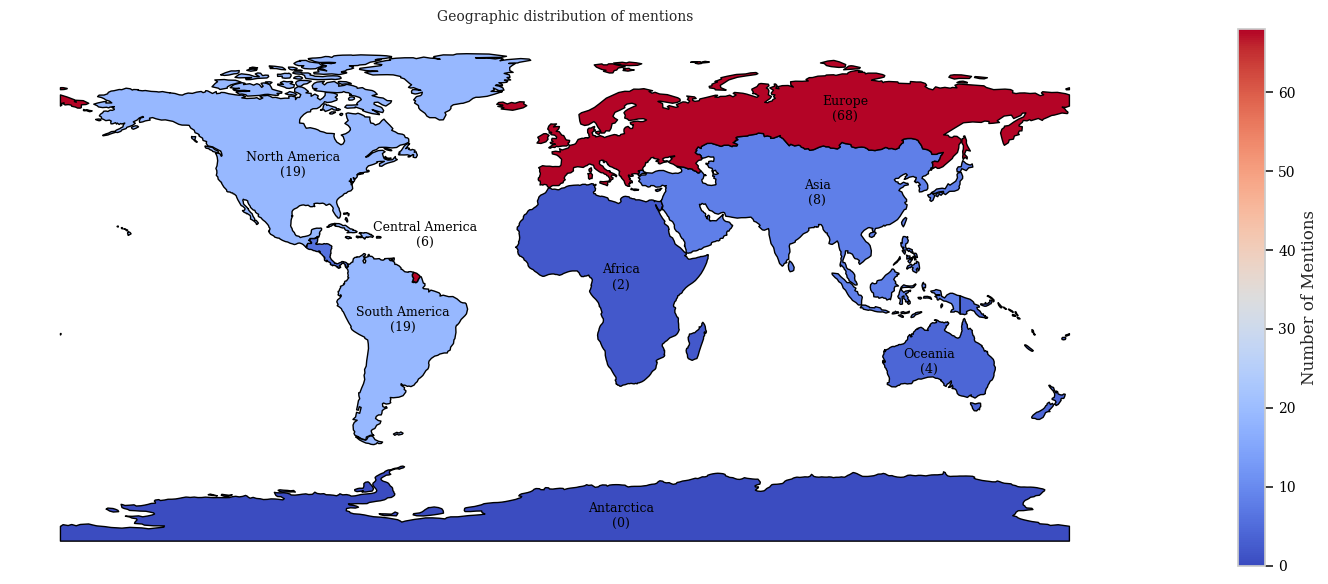

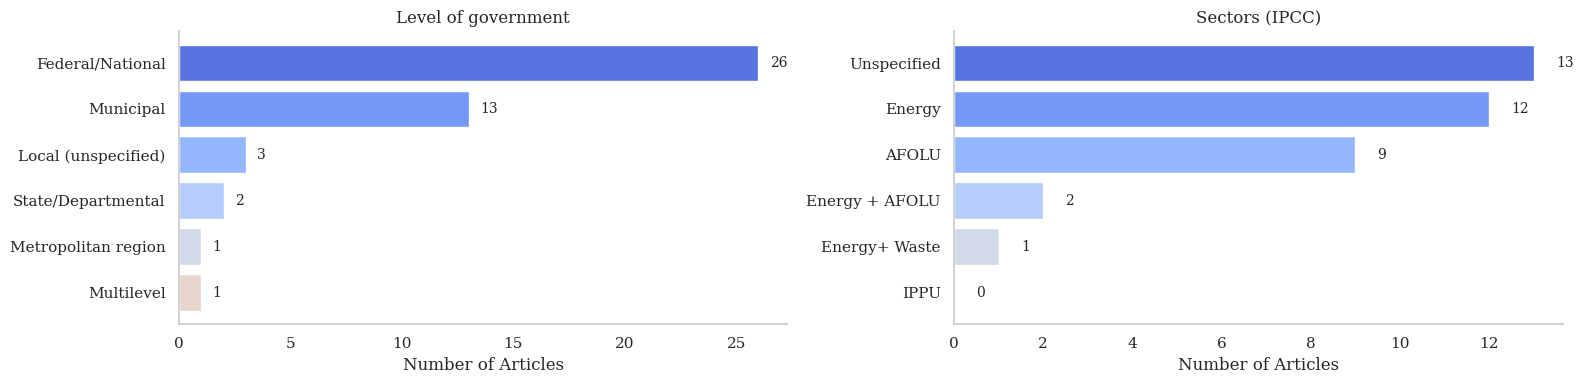

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

sns.set_style("whitegrid")

# -----------------------------
# fonts global setting
# -----------------------------
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif", "Times New Roman", "Times", "Nimbus Roman"],
    "axes.titleweight": "normal",
    "axes.labelweight": "normal",
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10
})

sns.set_theme(style="whitegrid", font="serif", rc={
    "font.serif": ["DejaVu Serif", "Times New Roman", "Times", "Nimbus Roman"]
})

# -----------------------------
# DATA
# -----------------------------
years = ['2015','2016', '2017','2018', '2019','2020', '2021', '2022','2023', '2024', '2025']
articles_year = [0,3,0,2,2,5, 7,2, 7, 6,3]

languages = ['English', 'Portuguese', 'Spanish']
articles_language = [33, 3, 1]

journals = ['Climate Policy', 'Sustainability', 'Cities', 'Others']
articles_journals = [7, 4, 3, 26]

govt = ['Federal/National', 'Municipal', 'State/Departmental', 'Local (unspecified)', 'Metropolitan region', 'Multilevel']
articles_govt = [26, 13, 2, 3, 1, 1]

methods = ['Qualitative', 'Quantitative', 'Mixed Methods']
articles_methods = [27, 6, 4]

sectors = ['Energy', 'AFOLU', 'Energy + AFOLU', 'Energy+ Waste', 'IPPU', 'Unspecified']
articles_sectors = [12, 9, 2, 1, 0, 13]

# ORDERED DataFrames
df_journals = pd.DataFrame({'journal': journals, 'articles': articles_journals}).sort_values(by='articles', ascending=False)
df_govt = pd.DataFrame({'govt': govt, 'articles': articles_govt}).sort_values(by='articles', ascending=False)
df_sectors = pd.DataFrame({'sector': sectors, 'articles': articles_sectors}).sort_values(by='articles', ascending=False)

# Palettes
bar_palette = sns.color_palette("coolwarm", 10)
pie_colors_language = sns.color_palette("coolwarm", len(languages))
pie_colors_methods = sns.color_palette("coolwarm", len(methods))

# -----------------------------
# LINE 1 – GRAPHS 1 TO 4
# -----------------------------
fig1, axs1 = plt.subplots(1,4, figsize=(16, 4))

# 1. YEAR OF PUBLICATION
axs1[0].plot(years, articles_year, marker='o', color=bar_palette[0])
axs1[0].set_title('Year of Publication', fontfamily='serif')
axs1[0].set_ylabel('Number of Articles', fontfamily='serif')
axs1[0].tick_params(axis='x', rotation=45)
axs1[0].grid(False)
sns.despine(ax=axs1[0])

# 2. Language
axs1[1].pie(
    articles_language, labels=languages, autopct='%1.1f%%', startangle=140,
    colors=pie_colors_language, textprops={'fontsize': 10, 'fontfamily':'serif'},
    pctdistance=0.85, radius=1.1
)
axs1[1].set_title('Languages', fontfamily='serif')

# 3. Journals
axs1[2].barh(df_journals['journal'], df_journals['articles'], color=bar_palette[:len(df_journals)])
axs1[2].invert_yaxis()
axs1[2].set_title('Journals', fontfamily='serif')
axs1[2].set_xlabel('Number of Articles', fontfamily='serif')
axs1[2].grid(False)
sns.despine(ax=axs1[2])

# intern - graph 3
for i, v in enumerate(df_journals['articles']):
    axs1[2].text(v + 0.5, i, str(v), ha='left', va='center', fontsize=10, fontfamily='serif')

# 4. Methods
axs1[3].pie(
    articles_methods, labels=methods, autopct='%1.1f%%', startangle=90,
    colors=pie_colors_methods, textprops={'fontsize': 10, 'fontfamily':'serif'}
)
axs1[3].set_title('Methodological Approach', fontfamily='serif')

plt.tight_layout()
plt.show()

# -----------------------------
# LINE 2 – GRAPH 5 (Map)
# -----------------------------
central_america= [
    "Belize", "Guatemala", "Honduras", "El Salvador", "Nicaragua",
    "Costa Rica", "Panama",
]

shapefile = "ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile)

world.loc[world["NAME"].isin(central_america), "CONTINENT"] = "Central America"

mentions = pd.DataFrame({
    "continent": ["Europe", "South America", "North America", "Asia", "Oceania", "Africa", "Central America", "Antarctica"],
    "mentions": [68, 19, 19, 8, 4, 2,6,0]
})

continents = world.dissolve(by="CONTINENT").reset_index()
merged = continents.merge(mentions, left_on="CONTINENT", right_on="continent", how="left")
merged = merged.dropna(subset=["mentions"])

pos_labels = {
    "Europe": (100, 60),
    "South America": (-58, -15),
    "North America": (-97, 40),
    "Asia": (90, 30),
    "Oceania": (130, -30),
    "Africa": (20, 0),
    "Central America": (-50, 15),
    "Antarctica": (20, -85),
}

fig2, ax2 = plt.subplots(figsize=(24, 6))
merged.plot(
    column="mentions", cmap="coolwarm", edgecolor="black",
    legend=True, legend_kwds={"label": "Number of Mentions"}, ax=ax2
)

# adjusting colorbar color
cbar_legend = ax2.get_figure().axes[-1]  #colorbar axis
cbar_legend.yaxis.label.set_fontfamily("serif")
cbar_legend.tick_params(labelsize=10, labelcolor='black')

#labels text
for idx, row in merged.iterrows():
    c = row['continent']
    if c in pos_labels:
        x, y = pos_labels[c]
        ax2.text(x, y, f"{c}\n({int(row['mentions'])})", ha='center', fontsize=9, fontfamily='serif', color='black')

ax2.set_title("Geographic distribution of mentions", fontsize=10, fontfamily='serif')
ax2.axis('off')
plt.tight_layout()
plt.show()


# -----------------------------
# LINE 3 – GRAPHS 6 AND 7
# -----------------------------
fig3, axs3 = plt.subplots(1, 2, figsize=(16, 4))

# 6. Level of government
axs3[0].barh(df_govt['govt'], df_govt['articles'], color=bar_palette[:len(df_govt)])
axs3[0].invert_yaxis()
axs3[0].set_title('Level of government', fontfamily='serif')
axs3[0].set_xlabel('Number of Articles', fontfamily='serif')
axs3[0].grid(False)
sns.despine(ax=axs3[0])

for i, v in enumerate(df_govt['articles']):
    axs3[0].text(v + 0.5, i, str(v), ha='left', va='center', fontsize=10, fontfamily='serif')

# 7. Sectors (IPCC)
axs3[1].barh(df_sectors['sector'], df_sectors['articles'], color=bar_palette[:len(df_sectors)])
axs3[1].invert_yaxis()
axs3[1].set_title('Sectors (IPCC)', fontfamily='serif')
axs3[1].set_xlabel('Number of Articles', fontfamily='serif')
axs3[1].grid(False)
sns.despine(ax=axs3[1])

for i, v in enumerate(df_sectors['articles']):
    axs3[1].text(v + 0.5, i, str(v), ha='left', va='center', fontsize=10, fontfamily='serif')

plt.tight_layout()
plt.show()

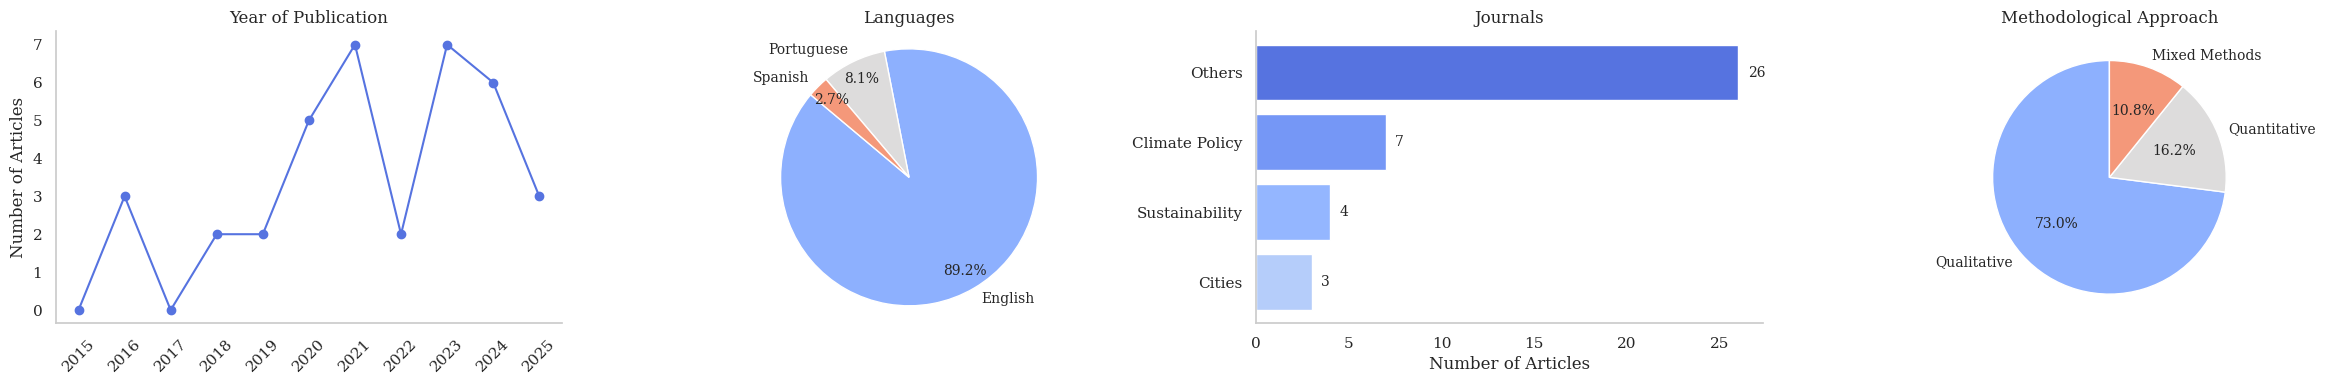

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

sns.set_style("whitegrid")

# -----------------------------
# fonts global setting
# -----------------------------
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif", "Times New Roman", "Times", "Nimbus Roman"],
    "axes.titleweight": "normal",
    "axes.labelweight": "normal",
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10
})

sns.set_theme(style="whitegrid", font="serif", rc={
    "font.serif": ["DejaVu Serif", "Times New Roman", "Times", "Nimbus Roman"]
})

# -----------------------------
# DATA
# -----------------------------
years = ['2015','2016', '2017','2018', '2019','2020', '2021', '2022','2023', '2024', '2025']
articles_year = [0,3,0,2,2,5, 7,2, 7, 6,3]

languages = ['English', 'Portuguese', 'Spanish']
articles_language = [33, 3, 1]

journals = ['Climate Policy', 'Sustainability', 'Cities', 'Others']
articles_journals = [7, 4, 3, 26]

govt = ['Federal/National', 'Municipal', 'State/Departmental', 'Local (unspecified)', 'Metropolitan region', 'Multilevel']
articles_govt = [26, 13, 2, 3, 1, 1]

methods = ['Qualitative', 'Quantitative', 'Mixed Methods']
articles_methods = [27, 6, 4]

sectors = ['Energy', 'AFOLU', 'Energy + AFOLU', 'Energy+ Waste', 'IPPU', 'Unspecified']
articles_sectors = [12, 9, 2, 1, 0, 13]

# ORDERED DataFrames
df_journals = pd.DataFrame({'journal': journals, 'articles': articles_journals}).sort_values(by='articles', ascending=False)
df_govt = pd.DataFrame({'govt': govt, 'articles': articles_govt}).sort_values(by='articles', ascending=False)
df_sectors = pd.DataFrame({'sector': sectors, 'articles': articles_sectors}).sort_values(by='articles', ascending=False)

# Palettes
bar_palette = sns.color_palette("coolwarm", 10)
pie_colors_language = sns.color_palette("coolwarm", len(languages))
pie_colors_methods = sns.color_palette("coolwarm", len(methods))

# -----------------------------
# LINHA 1 – GRÁFICOS 1 a 4
# -----------------------------
fig1, axs1 = plt.subplots(1,4, figsize=(24,4))

# 1. YEAR OF PUBLICATION
axs1[0].plot(years, articles_year, marker='o', color=bar_palette[0])
axs1[0].set_title('Year of Publication', fontfamily='serif')
axs1[0].set_ylabel('Number of Articles', fontfamily='serif')
axs1[0].tick_params(axis='x', rotation=45)
axs1[0].grid(False)
sns.despine(ax=axs1[0])

# 2. Language
axs1[1].pie(
    articles_language, labels=languages, autopct='%1.1f%%', startangle=140,
    colors=pie_colors_language, textprops={'fontsize': 10, 'fontfamily':'serif'},
    pctdistance=0.85, radius=1.1
)
axs1[1].set_title('Languages', fontfamily='serif')

# 3. Journals
axs1[2].barh(df_journals['journal'], df_journals['articles'], color=bar_palette[:len(df_journals)])
axs1[2].invert_yaxis()
axs1[2].set_title('Journals', fontfamily='serif')
axs1[2].set_xlabel('Number of Articles', fontfamily='serif')
axs1[2].grid(False)
sns.despine(ax=axs1[2])

# intern - graph 3
for i, v in enumerate(df_journals['articles']):
    axs1[2].text(v + 0.5, i, str(v), ha='left', va='center', fontsize=10, fontfamily='serif')

# 4. Methods
axs1[3].pie(
    articles_methods, labels=methods, autopct='%1.1f%%', startangle=90,
    colors=pie_colors_methods, textprops={'fontsize': 10, 'fontfamily':'serif'}
)
axs1[3].set_title('Methodological Approach', fontfamily='serif')

plt.tight_layout()
plt.show()

